<a href="https://colab.research.google.com/github/fedrikkhou/fedrikkhou/blob/main/New_York_City_Traffic_Accidents_Data_Cleaning_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#I. BACKGROUND OF THE ANALYSIS


## About Dataset and Objectives

**Title** : NYC Traffic Accidents

**Dataset Link** :
https://drive.google.com/file/d/1bUJzbAcC51Hqh9pciCF7G7WfTvQLZhXo/view?usp=sharing


**About Dataset** :
1. Motor vehicle collisions reported by the New York City Police Department
2. Record of New York traffic accidents from January until August 2020.
3. Few records present in the dataset including the date, time and location of the accident (borough, zip code, street name, latitude/longitude), type of vehicles, victims involved, and contributing factors.


**Objectives** :

1.	What is the situation and factor that contributing to traffic accidents in NYC ?



2.	What is the situation and factor that contributing to severe traffic accidents in NYC ?



3.	We want to decrease number of monthly traffic accident in NYC by improving the environment and preventing factor that contributing to traffic accident

4.	How to decrease number of monthly traffic accident in NYC from 8000 to 6000 ?

#II. DATA PREPARATION

##Import Library

In [ ]:
import pandas as pd                 # Library used for working with data sets and perform data analysis.
import numpy as np                  # To perform mathematical operasion and statistics
from datetime import datetime       # Used to perform dates and time manipulation
import seaborn as sns               # To perform data visualization
import matplotlib.pyplot as plt     # To perform data visualization

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

##Import Dataset

In [ ]:
csv_source_url = 'https://drive.google.com/uc?id=1sMzgnocVp7DCwY-t4B6g9sotQNIf6bPB'
df = pd.read_csv(csv_source_url)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74881 entries, 0 to 74880
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     74881 non-null  object 
 1   CRASH TIME                     74881 non-null  object 
 2   BOROUGH                        49140 non-null  object 
 3   ZIP CODE                       49134 non-null  float64
 4   LATITUDE                       68935 non-null  float64
 5   LONGITUDE                      68935 non-null  float64
 6   LOCATION                       68935 non-null  object 
 7   ON STREET NAME                 55444 non-null  object 
 8   CROSS STREET NAME              35681 non-null  object 
 9   OFF STREET NAME                19437 non-null  object 
 10  NUMBER OF PERSONS INJURED      74881 non-null  int64  
 11  NUMBER OF PERSONS KILLED       74881 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED  74881 non-null 

# III. DATA CLEANING

In [ ]:
df_dc = df.copy()

##A) Check data type and Missing values

In [ ]:
df_dc.shape

(74881, 29)

In [ ]:
df_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74881 entries, 0 to 74880
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     74881 non-null  object 
 1   CRASH TIME                     74881 non-null  object 
 2   BOROUGH                        49140 non-null  object 
 3   ZIP CODE                       49134 non-null  float64
 4   LATITUDE                       68935 non-null  float64
 5   LONGITUDE                      68935 non-null  float64
 6   LOCATION                       68935 non-null  object 
 7   ON STREET NAME                 55444 non-null  object 
 8   CROSS STREET NAME              35681 non-null  object 
 9   OFF STREET NAME                19437 non-null  object 
 10  NUMBER OF PERSONS INJURED      74881 non-null  int64  
 11  NUMBER OF PERSONS KILLED       74881 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED  74881 non-null 

In [ ]:
df_dc.isnull().sum()

CRASH DATE                           0
CRASH TIME                           0
BOROUGH                          25741
ZIP CODE                         25747
LATITUDE                          5946
LONGITUDE                         5946
LOCATION                          5946
ON STREET NAME                   19437
CROSS STREET NAME                39200
OFF STREET NAME                  55444
NUMBER OF PERSONS INJURED            0
NUMBER OF PERSONS KILLED             0
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1      304
CONTRIBUTING FACTOR VEHICLE 2    15596
CONTRIBUTING FACTOR VEHICLE 3    68116
CONTRIBUTING FACTOR VEHICLE 4    73030
CONTRIBUTING FACTOR VEHICLE 5    74358
COLLISION_ID                         0
VEHICLE TYPE CODE 1                635
VEHICLE TYPE CODE 2      

### Insight Missing Data:
    Total rows = 74880, Check null n decide remove or impute
    *   BOROUGH + ZIP CODE, 25741 rows, consider to impute using latitude + longitute
    *   LATITUDE + LONGITUDE + LOCATION, 5946 rows, null data delete, consider to delete columns if borough can be impute
    *   ON STREET NAME, 19437 rows, ???
    *   CROSS STREET NAME, 39200 rows, delete column ?
    *   OFF STREET NAME, 55444 rows, delete column ?
    *   CONTRIBUTING FACTOR VEHICLE 1, 304 rows, how many "Unspesified" ?
    *   CONTRIBUTING FACTOR VEHICLE 2, 15596 rows, how many "Unspesified" ?
    *   CONTRIBUTING FACTOR VEHICLE 3, 68116 rows, delete column ?
    *   CONTRIBUTING FACTOR VEHICLE 4, 73030 rows, delete column ?
    *   CONTRIBUTING FACTOR VEHICLE 5, 74358 rows, delete column ?, consider transform to new column to give number of vehicle that involve in accident ?
    *   VEHICLE TYPE CODE 1, 635 rows
    *   VEHICLE TYPE CODE 2, 21243 rows, delete ?
    *   VEHICLE TYPE CODE 3, 68457 rows, delete column ?
    *   VEHICLE TYPE CODE 4, 73110 rows, delete column ?
    *   VEHICLE TYPE CODE 5, 74378 rows, delete column ?
    *   NUMBER OF PERSONS INJURED, 0 rows, this number is total from PEDESTRIANS + CYCLIST + MOTORIST
    *   NUMBER OF PERSONS KILLED, 0 rows, this number is total from PEDESTRIANS + CYCLIST + MOTORIST
    *   NUMBER OF PEDESTRIANS INJURED, 0 rows, delete ?
    *   NUMBER OF PEDESTRIANS KILLED, 0 rows, delete ?
    *   NUMBER OF CYCLIST INJURED, 0 rows, delete ?
    *   NUMBER OF CYCLIST KILLED, 0 rows, delete ?
    *   NUMBER OF MOTORIST INJURED, 0 rows, delete ?
    *   NUMBER OF MOTORIST KILLED, 0 rows, delete ?

###Insight Data Type:
*   CRASH DATE change to datetime
*   CRASH TIME change to datetime
*   ZIP CODE change to string
*   COLLISION_ID change to string

##B) Check for values and typo

In [ ]:
df_dc.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

###1) CRASH DATE and CRASH TIME

In [ ]:
df_dc['CRASH DATE'].value_counts()

2020-01-18    773
2020-03-06    673
2020-02-14    631
2020-02-07    603
2020-02-27    581
             ... 
2020-04-23    108
2020-04-12    105
2020-04-19    102
2020-04-09    102
2020-04-05     93
Name: CRASH DATE, Length: 242, dtype: int64

In [ ]:
df_dc['CRASH TIME'].value_counts()

00:00:00    1234
16:00:00     943
15:00:00     909
17:00:00     883
14:00:00     876
            ... 
05:16:00       2
04:36:00       1
04:52:00       1
05:32:00       1
04:41:00       1
Name: CRASH TIME, Length: 1440, dtype: int64

###2) BOROUGH and ZIP CODE

In [ ]:
df_dc['BOROUGH'].value_counts()

BROOKLYN         16907
QUEENS           14017
BRONX             9417
MANHATTAN         7353
STATEN ISLAND     1446
Name: BOROUGH, dtype: int64

In [ ]:
df_dc['ZIP CODE'].value_counts()

11207.0    1123
11236.0     936
11212.0     850
11203.0     809
11385.0     783
           ... 
10118.0       1
10169.0       1
10271.0       1
10112.0       1
10172.0       1
Name: ZIP CODE, Length: 198, dtype: int64

###3) LATITUDE, LONGITUDE and LOCATION

In [ ]:
df_dc['LATITUDE'].value_counts()

40.861862    80
0.000000     63
40.651863    42
40.820305    41
40.804700    40
             ..
40.586370     1
40.698864     1
40.656353     1
40.653854     1
40.582935     1
Name: LATITUDE, Length: 29106, dtype: int64

In [ ]:
df_dc['LONGITUDE'].value_counts()

-73.912820    81
 0.000000     63
-73.890830    47
-73.865360    47
-73.912430    46
              ..
-73.902220     1
-74.079254     1
-73.765350     1
-73.808640     1
-73.830960     1
Name: LONGITUDE, Length: 23552, dtype: int64

In [ ]:
df_dc['LOCATION'].value_counts()

POINT (-73.91282 40.861862)     80
POINT (0 0)                     63
POINT (-73.89083 40.820305)     41
POINT (-73.91243 40.8047)       40
POINT (-73.86536 40.651863)     38
                                ..
POINT (-73.848816 40.72399)      1
POINT (-73.992645 40.578117)     1
POINT (-73.99862 40.732212)      1
POINT (-73.87268 40.718525)      1
POINT (-73.83096 40.726875)      1
Name: LOCATION, Length: 36749, dtype: int64

###4) ON STREET NAME, CROSS STREET NAME and OFF STREET NAME

In [ ]:
df_dc['ON STREET NAME'].value_counts()

BELT PARKWAY                  1241
LONG ISLAND EXPRESSWAY         745
BROOKLYN QUEENS EXPRESSWAY     738
FDR DRIVE                      728
MAJOR DEEGAN EXPRESSWAY        591
                              ... 
GULF AVENUE                      1
E 170 St                         1
BAYSIDE LANE                     1
ES KOCH BRIDGE                   1
CRESSKILL PLACE                  1
Name: ON STREET NAME, Length: 4009, dtype: int64

In [ ]:
df_dc['CROSS STREET NAME'].value_counts()

3 AVENUE             350
BROADWAY             313
2 AVENUE             235
LINDEN BOULEVARD     213
5 AVENUE             197
                    ... 
HARLEM RIVER PARK      1
WEST 83 STREET         1
OBRIEN AVENUE          1
BEACH 89 STREET        1
151 STREET             1
Name: CROSS STREET NAME, Length: 4405, dtype: int64

In [ ]:
df_dc['OFF STREET NAME'].value_counts()

772 EDGEWATER ROAD           29
501 GATEWAY DRIVE            15
450 FLATBUSH AVENUE          12
625 ATLANTIC AVENUE          11
110-00 ROCKAWAY BOULEVARD    11
                             ..
34 MILDRED AVENUE             1
3333 BAYCHESTER AVENUE        1
376 UNION AVENUE              1
1382 EAST 49 STREET           1
70-25 PARK DRIVE EAST         1
Name: OFF STREET NAME, Length: 17451, dtype: int64

###5) NUMBER OF PERSONS INJURED and NUMBER OF PERSONS KILLED

In [ ]:
df_dc['NUMBER OF PERSONS INJURED'].value_counts()

0     54460
1     15846
2      3032
3       995
4       340
5       128
6        42
7        20
8         9
9         6
10        2
15        1
Name: NUMBER OF PERSONS INJURED, dtype: int64

In [ ]:
df_dc['NUMBER OF PERSONS KILLED'].value_counts()

0    74746
1      129
2        4
3        1
4        1
Name: NUMBER OF PERSONS KILLED, dtype: int64

###6) NUMBER OF PEDESTRIANS INJURED and NUMBER OF PEDESTRIANS KILLED

In [ ]:
df_dc['NUMBER OF PEDESTRIANS INJURED'].value_counts()

0    70928
1     3830
2      104
3       17
6        1
4        1
Name: NUMBER OF PEDESTRIANS INJURED, dtype: int64

In [ ]:
df_dc['NUMBER OF PEDESTRIANS KILLED'].value_counts()

0    74825
1       56
Name: NUMBER OF PEDESTRIANS KILLED, dtype: int64

###7) NUMBER OF CYCLIST INJURED and NUMBER OF CYCLIST KILLED

In [ ]:
df_dc['NUMBER OF CYCLIST INJURED'].value_counts()

0    71689
1     3112
2       79
3        1
Name: NUMBER OF CYCLIST INJURED, dtype: int64

In [ ]:
df_dc['NUMBER OF CYCLIST KILLED'].value_counts()

0    74872
1        9
Name: NUMBER OF CYCLIST KILLED, dtype: int64

###8) NUMBER OF MOTORIST INJURED and NUMBER OF MOTORIST KILLED

In [ ]:
df_dc['NUMBER OF MOTORIST INJURED'].value_counts()

0     61453
1      9161
2      2772
3       956
4       338
5       125
6        40
7        19
8         8
9         6
10        2
15        1
Name: NUMBER OF MOTORIST INJURED, dtype: int64

In [ ]:
df_dc['NUMBER OF MOTORIST KILLED'].value_counts()

0    74810
1       66
2        3
3        1
4        1
Name: NUMBER OF MOTORIST KILLED, dtype: int64

###9) CONTRIBUTING FACTOR VEHICLE 1 - 5

In [ ]:
df_dc['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Unspecified                                              19471
Driver Inattention/Distraction                           19123
Following Too Closely                                     5202
Failure to Yield Right-of-Way                             4815
Passing or Lane Usage Improper                            2840
Backing Unsafely                                          2829
Passing Too Closely                                       2687
Other Vehicular                                           2233
Unsafe Speed                                              2015
Unsafe Lane Changing                                      1809
Traffic Control Disregarded                               1544
Turning Improperly                                        1399
Driver Inexperience                                       1290
Reaction to Uninvolved Vehicle                            1197
Alcohol Involvement                                        974
Pavement Slippery                                      

In [ ]:
df_dc['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()

Unspecified                                              49850
Driver Inattention/Distraction                            3815
Following Too Closely                                      926
Other Vehicular                                            905
Passing or Lane Usage Improper                             556
Failure to Yield Right-of-Way                              496
Passing Too Closely                                        399
Unsafe Speed                                               315
Unsafe Lane Changing                                       300
Traffic Control Disregarded                                278
Backing Unsafely                                           188
Turning Improperly                                         179
Reaction to Uninvolved Vehicle                             176
Driver Inexperience                                        145
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion      136
View Obstructed/Limited                                

In [ ]:
df_dc['CONTRIBUTING FACTOR VEHICLE 3'].value_counts()

Unspecified                                              6323
Other Vehicular                                           133
Following Too Closely                                     117
Driver Inattention/Distraction                            100
Reaction to Uninvolved Vehicle                             16
Pavement Slippery                                          13
Unsafe Speed                                                8
Unsafe Lane Changing                                        6
Passing Too Closely                                         5
Alcohol Involvement                                         5
View Obstructed/Limited                                     4
Obstruction/Debris                                          4
Failure to Yield Right-of-Way                               4
Passing or Lane Usage Improper                              4
Aggressive Driving/Road Rage                                3
Driver Inexperience                                         3
Backing 

In [ ]:
df_dc['CONTRIBUTING FACTOR VEHICLE 4'].value_counts()

Unspecified                       1751
Other Vehicular                     46
Following Too Closely               22
Driver Inattention/Distraction      19
Reaction to Uninvolved Vehicle       3
Pavement Slippery                    3
Aggressive Driving/Road Rage         2
Backing Unsafely                     1
Outside Car Distraction              1
Alcohol Involvement                  1
Passing Too Closely                  1
Unsafe Speed                         1
Name: CONTRIBUTING FACTOR VEHICLE 4, dtype: int64

In [ ]:
df_dc['CONTRIBUTING FACTOR VEHICLE 5'].value_counts()

Unspecified                       491
Other Vehicular                    18
Following Too Closely               8
Driver Inattention/Distraction      3
Pavement Slippery                   2
Passing Too Closely                 1
Name: CONTRIBUTING FACTOR VEHICLE 5, dtype: int64

###10) COLLISION_ID

In [ ]:
df_dc['COLLISION_ID'].value_counts()

4342908    1
4292920    1
4293345    1
4292800    1
4292958    1
          ..
4318224    1
4317740    1
4317661    1
4318292    1
4268376    1
Name: COLLISION_ID, Length: 74881, dtype: int64

###11) VEHICLE TYPE CODE 1 - 5

In [ ]:
df_dc['VEHICLE TYPE CODE 1'].value_counts()

Sedan                                  34349
Station Wagon/Sport Utility Vehicle    27541
Taxi                                    2768
Pick-up Truck                           1882
Box Truck                               1417
                                       ...  
ELEC. UNIC                                 1
1C                                         1
DELIVERY T                                 1
MTA BUS                                    1
TANK                                       1
Name: VEHICLE TYPE CODE 1, Length: 272, dtype: int64

In [ ]:
df_dc['VEHICLE TYPE CODE 2'].value_counts()

Sedan                                  22884
Station Wagon/Sport Utility Vehicle    18626
Bike                                    2300
Taxi                                    1662
Pick-up Truck                           1568
                                       ...  
UTILITY TR                                 1
PC                                         1
AMB                                        1
UHAUL                                      1
crane                                      1
Name: VEHICLE TYPE CODE 2, Length: 290, dtype: int64

In [ ]:
df_dc['VEHICLE TYPE CODE 3'].value_counts()

Sedan                                  3136
Station Wagon/Sport Utility Vehicle    2673
Pick-up Truck                           150
Taxi                                    133
Box Truck                                71
Bus                                      34
Van                                      31
Bike                                     30
Tractor Truck Diesel                     28
Convertible                              21
Motorcycle                               20
4 dr sedan                               10
Flat Bed                                 10
PK                                        8
E-Scooter                                 6
Dump                                      5
Tow Truck / Wrecker                       5
E-Bike                                    4
Carry All                                 4
Multi-Wheeled Vehicle                     3
Chassis Cab                               3
van                                       3
Ambulance                       

In [ ]:
df_dc['VEHICLE TYPE CODE 4'].value_counts()

Sedan                                  881
Station Wagon/Sport Utility Vehicle    757
Pick-up Truck                           43
Taxi                                    28
Box Truck                               10
Convertible                              8
Motorcycle                               7
Bus                                      6
Dump                                     5
Van                                      4
Tractor Truck Diesel                     3
Bike                                     2
LIMO                                     2
E-Scooter                                2
Chassis Cab                              2
Refrigerated Van                         1
FLATBED TR                               1
CARGO VAN                                1
E-Bike                                   1
TRAILER                                  1
trailor                                  1
4 dr sedan                               1
Box                                      1
Carry All  

In [ ]:
df_dc['VEHICLE TYPE CODE 5'].value_counts()

Sedan                                  250
Station Wagon/Sport Utility Vehicle    207
Pick-up Truck                           15
Van                                      6
Taxi                                     5
PK                                       3
Motorcycle                               3
Convertible                              3
Box Truck                                3
Tractor Truck Diesel                     2
Motorscooter                             1
E-Scooter                                1
BOX Truck                                1
Box truck                                1
Dump                                     1
Bus                                      1
Name: VEHICLE TYPE CODE 5, dtype: int64

##C) Treat Missing & Irrelevant Values

###1) Borough / Latitude + Longitude / Location

Insight:
*   if BOROUGH is null then ZIP CODE also null
*   Use column LOCATION to fill BOROUGH and ZIP CODE



In [ ]:
df_dc.isnull().sum()

CRASH DATE                           0
CRASH TIME                           0
BOROUGH                          25741
ZIP CODE                         25747
LATITUDE                          5946
LONGITUDE                         5946
LOCATION                          5946
ON STREET NAME                   19437
CROSS STREET NAME                39200
OFF STREET NAME                  55444
NUMBER OF PERSONS INJURED            0
NUMBER OF PERSONS KILLED             0
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1      304
CONTRIBUTING FACTOR VEHICLE 2    15596
CONTRIBUTING FACTOR VEHICLE 3    68116
CONTRIBUTING FACTOR VEHICLE 4    73030
CONTRIBUTING FACTOR VEHICLE 5    74358
COLLISION_ID                         0
VEHICLE TYPE CODE 1                635
VEHICLE TYPE CODE 2      

In [ ]:
#some data has location 'POINT (0 0)', and that geolocation appear in several borough
df_exclude_location00 = df_dc[~((df_dc['LOCATION'] == 'POINT (0 0)') & (df_dc['BOROUGH'].isnull()))]

df_dc["BOROUGH"] = df_exclude_location00.groupby("LOCATION")["BOROUGH"].ffill()
df_dc["ZIP CODE"] = df_exclude_location00.groupby("LOCATION")["ZIP CODE"].ffill()
df_dc["BOROUGH"] = df_dc.groupby("ZIP CODE")["BOROUGH"].ffill()
df_dc.isnull().sum()  #25741 ==> 22514 change 3,236

CRASH DATE                           0
CRASH TIME                           0
BOROUGH                          22514
ZIP CODE                         22514
LATITUDE                          5946
LONGITUDE                         5946
LOCATION                          5946
ON STREET NAME                   19437
CROSS STREET NAME                39200
OFF STREET NAME                  55444
NUMBER OF PERSONS INJURED            0
NUMBER OF PERSONS KILLED             0
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1      304
CONTRIBUTING FACTOR VEHICLE 2    15596
CONTRIBUTING FACTOR VEHICLE 3    68116
CONTRIBUTING FACTOR VEHICLE 4    73030
CONTRIBUTING FACTOR VEHICLE 5    74358
COLLISION_ID                         0
VEHICLE TYPE CODE 1                635
VEHICLE TYPE CODE 2      

In [ ]:
#CODE to find BOROUGH for rows that still NULL
#PERSONS KILLED deleted: 55 ==> 14
#PERSONs INJURED deleted: 6781 ==> 1693
csv_additional_source_url = 'https://drive.google.com/uc?id=1f53GZfriwJJ7MV2BKlgioSzR4Oz5HYh4'
df_additional_source = pd.read_csv(csv_additional_source_url, sep=';')
df_dc = pd.merge(df_dc, df_additional_source, on='COLLISION_ID', how = 'left')

def getborough2(row):
  if (pd.isnull(row['BOROUGH']) ):
    if (pd.notnull(row['FOUND BOROUGH'])):
      return row['FOUND BOROUGH']
  else:
    return row['BOROUGH']

df_dc['BOROUGH'] = df_dc.apply(getborough2, axis=1)
df_dc[['ZIP CODE']] = df_dc[['ZIP CODE']].fillna('-')
df_dc.drop(columns = 'LOCATION2', inplace = True)
df_dc.drop(columns = 'FOUND BOROUGH', inplace = True)

Remove data with missing BOROUGH and ZIP CODE

In [ ]:
df_dc = df_dc[~df_dc['BOROUGH'].isna()]
df_dc = df_dc[~df_dc['ZIP CODE'].isna()]
df_dc.isnull().sum()

CRASH DATE                           0
CRASH TIME                           0
BOROUGH                              0
ZIP CODE                             0
LATITUDE                             0
LONGITUDE                            0
LOCATION                             0
ON STREET NAME                   18556
CROSS STREET NAME                26990
OFF STREET NAME                  38927
NUMBER OF PERSONS INJURED            0
NUMBER OF PERSONS KILLED             0
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1      275
CONTRIBUTING FACTOR VEHICLE 2    12556
CONTRIBUTING FACTOR VEHICLE 3    52394
CONTRIBUTING FACTOR VEHICLE 4    56032
CONTRIBUTING FACTOR VEHICLE 5    57050
COLLISION_ID                         0
VEHICLE TYPE CODE 1                583
VEHICLE TYPE CODE 2      

###2) ON Street + CROSS Street + OFF Street

Insight after exploring the 3 columns, we found that there are 3 type of STREET data:
1. ON STREET only, CROSS and OFF STREET NAME always NULL
2. ON STREET + CROSS STREET, OFF STREET NAME always NULL
3. OFF STREET only, ON and CROSS STREET NAME always NULL

So, we decide to fill the null data with '-'

In [ ]:
df_dc[['ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME']] = df_dc[['ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME']].fillna('-')

In [ ]:
df_dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57483 entries, 0 to 74880
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     57483 non-null  object 
 1   CRASH TIME                     57483 non-null  object 
 2   BOROUGH                        57483 non-null  object 
 3   ZIP CODE                       57483 non-null  object 
 4   LATITUDE                       57483 non-null  float64
 5   LONGITUDE                      57483 non-null  float64
 6   LOCATION                       57483 non-null  object 
 7   ON STREET NAME                 57483 non-null  object 
 8   CROSS STREET NAME              57483 non-null  object 
 9   OFF STREET NAME                57483 non-null  object 
 10  NUMBER OF PERSONS INJURED      57483 non-null  int64  
 11  NUMBER OF PERSONS KILLED       57483 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED  57483 non-null 

###3) Number of Persons Injured and Killed

Before Cleaning:
*   rows with PERSON KILLED = 135 rows
*   total PERSON KILLED = 144
*   rows with PERSON INJURED = 20421 rows
*   total PERSON INJURED = 27448


In [ ]:
rows = df_dc[(df_dc['NUMBER OF PERSONS KILLED']>0)]['NUMBER OF PERSONS KILLED'].count()
print(f'rows with PERSON KILLED = {rows} rows')
totalkilled = df_dc['NUMBER OF PERSONS KILLED'].sum()
print(f'total PERSON KILLED = {totalkilled}')

rows = df_dc[(df_dc['NUMBER OF PERSONS INJURED']>0)]['NUMBER OF PERSONS INJURED'].count()
print(f'rows with PERSON INJURED = {rows} rows')
totalinjured = df_dc['NUMBER OF PERSONS INJURED'].sum()
print(f'total PERSON INJURED = {totalinjured}')

rows with PERSON KILLED = 121 rows
total PERSON KILLED = 128
rows with PERSON INJURED = 18728 rows
total PERSON INJURED = 24996


Insight:
*   NUMBER OF PERSONS INJURED = NUMBER OF (PEDESTRIANS + CYCLIST + MOTORIST) INJURED
*   NUMBER OF PERSONS KILLED = NUMBER OF (PEDESTRIANS + CYCLIST + MOTORIST) KILLED
*   Only 121 rows that has PERSONS KILLED
*   Total PERSONS KILLED = 128

NO changes / action





###4) Contributing Factors Vehicle 1 - 5

CONTRIBUTING FACTOR VEHICLE 1 - 5, a lot of NULL dan Unspecified values

Null
*   CONTRIBUTING FACTOR VEHICLE 1 = 304
*   CONTRIBUTING FACTOR VEHICLE 2 = 15596
*   CONTRIBUTING FACTOR VEHICLE 3 = 68116
*   CONTRIBUTING FACTOR VEHICLE 4 = 73030
*   CONTRIBUTING FACTOR VEHICLE 5 = 74358

Unspecified                                              
*   CONTRIBUTING FACTOR VEHICLE 1 = 19471
*   CONTRIBUTING FACTOR VEHICLE 2 = 49850
*   CONTRIBUTING FACTOR VEHICLE 3 = 6323
*   CONTRIBUTING FACTOR VEHICLE 4 = 1751
*   CONTRIBUTING FACTOR VEHICLE 5 = 491
                           
Decide to Drop columns: CONTRIBUTING FACTOR VEHICLE 3-5
                       
                           
            

In [ ]:
#fill fatal accident that has
df_dc[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2']] = df_dc[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2']].fillna('-')

In [ ]:
#df_dc.drop(columns = 'CONTRIBUTING FACTOR VEHICLE 2', inplace = True)
df_dc.drop(columns = 'CONTRIBUTING FACTOR VEHICLE 3', inplace = True)
df_dc.drop(columns = 'CONTRIBUTING FACTOR VEHICLE 4', inplace = True)
df_dc.drop(columns = 'CONTRIBUTING FACTOR VEHICLE 5', inplace = True)

In [ ]:
df_dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57483 entries, 0 to 74880
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     57483 non-null  object 
 1   CRASH TIME                     57483 non-null  object 
 2   BOROUGH                        57483 non-null  object 
 3   ZIP CODE                       57483 non-null  object 
 4   LATITUDE                       57483 non-null  float64
 5   LONGITUDE                      57483 non-null  float64
 6   LOCATION                       57483 non-null  object 
 7   ON STREET NAME                 57483 non-null  object 
 8   CROSS STREET NAME              57483 non-null  object 
 9   OFF STREET NAME                57483 non-null  object 
 10  NUMBER OF PERSONS INJURED      57483 non-null  int64  
 11  NUMBER OF PERSONS KILLED       57483 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED  57483 non-null 

###5) Vehicle type code 1 - 5

NULL
*   VEHICLE TYPE CODE 1 = 635
*   VEHICLE TYPE CODE 2 = 21243
*   VEHICLE TYPE CODE 3 = 68457
*   VEHICLE TYPE CODE 4 = 73110
*   VEHICLE TYPE CODE 5 = 74378

Decide to
1.   Add column NUMBER OF VEHICLES to give number of vehicles that involve in accident
2.   Remove rows with VEHICLE TYPE CODE 1 is NULL
3.   Drop columns: VEHICLE TYPE CODE 3 - 5
4.   Fill data in VEHICLE TYPE CODE 1 is NULL with '-'  





In [ ]:
def getnumberofvehicle(row):
  numberofvehicle = 0
  if (pd.notnull(row['VEHICLE TYPE CODE 1'])):
    numberofvehicle = 1

  if (pd.notnull(row['VEHICLE TYPE CODE 2'])):
    numberofvehicle = numberofvehicle + 1

  if (pd.notnull(row['VEHICLE TYPE CODE 3'])):
    numberofvehicle = numberofvehicle + 1

  if (pd.notnull(row['VEHICLE TYPE CODE 4'])):
    numberofvehicle = numberofvehicle + 1

  if (pd.notnull(row['VEHICLE TYPE CODE 5'])):
    numberofvehicle = numberofvehicle + 1

  return numberofvehicle

df_dc['NUMBER OF VEHICLES'] = df_dc.apply(getnumberofvehicle, axis=1)

In [ ]:
df_dc.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'COLLISION_ID', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'NUMBER OF VEHICLES'],
      dtype='object')

In [ ]:
#4 rows of fatal accident that VEHICLE TYPE CODE 1 is null filled with '-' to prevent delete
df_dc.loc[((df_dc['VEHICLE TYPE CODE 1'].isnull()) & (df_dc['NUMBER OF PERSONS KILLED'] > 0)), ['VEHICLE TYPE CODE 1']] = '-'

df_dc = df_dc[~(df_dc['VEHICLE TYPE CODE 1'].isnull())]
df_dc[['VEHICLE TYPE CODE 2']] = df_dc[['VEHICLE TYPE CODE 2']].fillna('-')

<ipython-input-53-e673ec1a30cd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dc[['VEHICLE TYPE CODE 2']] = df_dc[['VEHICLE TYPE CODE 2']].fillna('-')


In [ ]:
df_dc.drop(columns = 'VEHICLE TYPE CODE 3', inplace = True)
df_dc.drop(columns = 'VEHICLE TYPE CODE 4', inplace = True)
df_dc.drop(columns = 'VEHICLE TYPE CODE 5', inplace = True)

<ipython-input-54-086059aa343c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dc.drop(columns = 'VEHICLE TYPE CODE 3', inplace = True)
<ipython-input-54-086059aa343c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dc.drop(columns = 'VEHICLE TYPE CODE 4', inplace = True)
<ipython-input-54-086059aa343c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dc.drop(columns = 'VEHICLE TYPE CODE 5', inplace = True)


In [ ]:
df_dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56904 entries, 0 to 74880
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     56904 non-null  object 
 1   CRASH TIME                     56904 non-null  object 
 2   BOROUGH                        56904 non-null  object 
 3   ZIP CODE                       56904 non-null  object 
 4   LATITUDE                       56904 non-null  float64
 5   LONGITUDE                      56904 non-null  float64
 6   LOCATION                       56904 non-null  object 
 7   ON STREET NAME                 56904 non-null  object 
 8   CROSS STREET NAME              56904 non-null  object 
 9   OFF STREET NAME                56904 non-null  object 
 10  NUMBER OF PERSONS INJURED      56904 non-null  int64  
 11  NUMBER OF PERSONS KILLED       56904 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED  56904 non-null 

##D) Check Duplicates

In [ ]:
df_dc[df_dc['COLLISION_ID'].duplicated()]['COLLISION_ID']

Series([], Name: COLLISION_ID, dtype: int64)

In [ ]:
df_dc[df_dc.duplicated()]

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,NUMBER OF VEHICLES


##E) Fix Data Type

*   CRASH DATE change to datetime
*   CRASH TIME change to datetime
*   ZIP CODE change to string
*   COLLISION_ID change to string






In [ ]:
df_dc['CRASH TIME'].value_counts()

00:00:00    944
16:00:00    713
15:00:00    705
14:00:00    662
17:00:00    659
           ... 
05:17:00      1
06:13:00      1
05:44:00      1
03:47:00      1
02:42:00      1
Name: CRASH TIME, Length: 1438, dtype: int64

In [ ]:
df_dc['CRASH DATE'] = pd.to_datetime(df_dc['CRASH DATE'], format = '%Y-%m-%d')
df_dc['CRASH TIME'] = pd.to_datetime(df_dc['CRASH TIME'], format = '%H:%M:%S')
df_dc['ZIP CODE'] = df_dc['ZIP CODE'].astype(str)
df_dc['COLLISION_ID'] = df_dc['COLLISION_ID'].astype(str)

In [ ]:
df_dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56904 entries, 0 to 74880
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CRASH DATE                     56904 non-null  datetime64[ns]
 1   CRASH TIME                     56904 non-null  datetime64[ns]
 2   BOROUGH                        56904 non-null  object        
 3   ZIP CODE                       56904 non-null  object        
 4   LATITUDE                       56904 non-null  float64       
 5   LONGITUDE                      56904 non-null  float64       
 6   LOCATION                       56904 non-null  object        
 7   ON STREET NAME                 56904 non-null  object        
 8   CROSS STREET NAME              56904 non-null  object        
 9   OFF STREET NAME                56904 non-null  object        
 10  NUMBER OF PERSONS INJURED      56904 non-null  int64         
 11  NUMBER OF PERSO

#IV. EDA

In [ ]:
df_eda = df_dc.copy()

##1.1 Check Month, Week and Day when most accidents happened

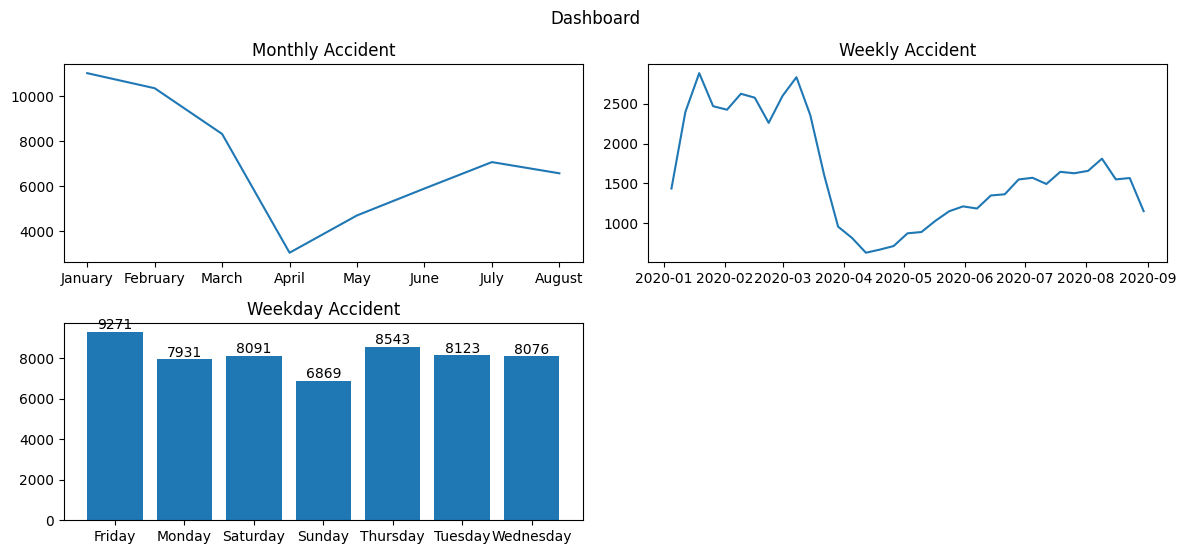

In [ ]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)

#chart 1
df_accident_monthly = df_eda.groupby(pd.Grouper(key='CRASH DATE', freq='M')).count()['COLLISION_ID']
df_accident_monthly = pd.DataFrame(df_accident_monthly)
df_accident_monthly = df_accident_monthly.reset_index()
df_accident_monthly['MONTH NAME'] = df_accident_monthly['CRASH DATE'].dt.month_name()
ax1.plot(df_accident_monthly['MONTH NAME'], df_accident_monthly['COLLISION_ID'])
ax1.set_title('Monthly Accident')

#chart 2
accident_weekly = df_eda.groupby(pd.Grouper(key='CRASH DATE', freq='W')).count()['COLLISION_ID']
accident_weekly = pd.DataFrame(accident_weekly)
accident_weekly = accident_weekly.reset_index()
ax2.plot(accident_weekly['CRASH DATE'], accident_weekly['COLLISION_ID'])
ax2.set_title('Weekly Accident')

#chart 3
accident_weekday = df_eda.groupby(df_eda['CRASH DATE'].dt.day_name())['COLLISION_ID'].count()
accident_weekday = pd.DataFrame(accident_weekday)
accident_weekday = accident_weekday.reset_index()
ax3_container = ax3.bar(accident_weekday['CRASH DATE'], accident_weekday['COLLISION_ID'])
ax3.set_title('Weekday Accident')
ax3.bar_label(ax3_container)

# Set figure's title
fig.suptitle("Dashboard")

plt.tight_layout()

##1.2 Check time / hour when most accidents happened

<Axes: xlabel='CRASH TIME'>

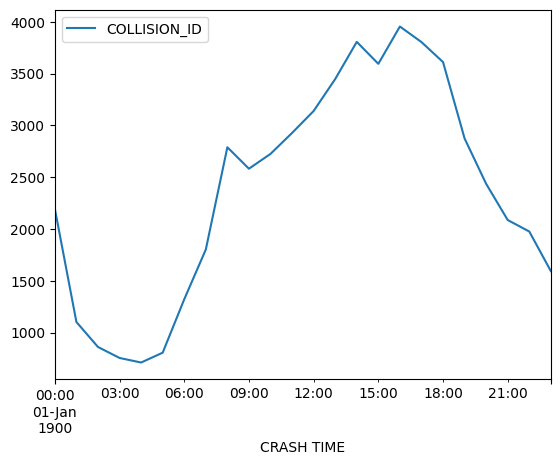

In [ ]:
# Let's do trend of accidents
accident_hourly = df_eda.groupby(pd.Grouper(key='CRASH TIME', freq='H')).count()['COLLISION_ID']
accident_hourly = pd.DataFrame(accident_hourly)
# Visualize the data
accident_hourly.plot(kind='line')

##1.3 Check borough where most accidents happened

<Axes: ylabel='BOROUGH'>

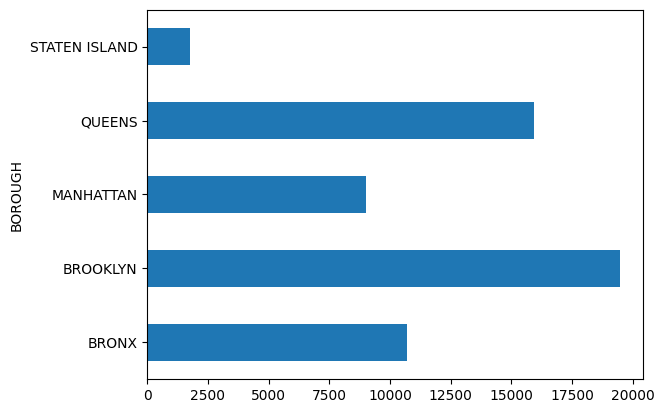

In [ ]:
accident_borough = df_eda.groupby(df_eda['BOROUGH'])['COLLISION_ID'].count()
accident_borough.plot(kind='barh')

##1.4 Check street where most accidents happened

In [ ]:
accident_street = df_eda.groupby([df_eda['ON STREET NAME'], df_eda['CROSS STREET NAME'], df_eda['OFF STREET NAME'] ])['COLLISION_ID'].count()
accident_street = accident_street.reset_index()
accident_street = accident_street.sort_values('COLLISION_ID', ascending = False)
accident_street.head(20)

,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,COLLISION_ID
23450,BELT PARKWAY,-,-,421
28917,GRAND CENTRAL PKWY,-,-,206
24181,BROOKLYN QUEENS EXPRESSWAY,-,-,198
30915,LONG ISLAND EXPRESSWAY,-,-,195
31127,MAJOR DEEGAN EXPRESSWAY,-,-,185
28086,FDR DRIVE,-,-,185
35122,VAN WYCK EXPWY,-,-,156
25326,CROSS BRONX EXPY,-,-,145
23877,BROADWAY,-,-,126
25327,CROSS ISLAND PARKWAY,-,-,125


In [ ]:
def typeofstreetaccident(row):
    onstreet = row['ON STREET NAME']
    crosssstreet = row['CROSS STREET NAME']
    offstreet = row['OFF STREET NAME']

    if (onstreet == '-'): #asumsi if on street null maka off street
      return 'OFF STREET'
    else:
      if(crosssstreet == '-'): #if cross street null maka on street
        return 'ON STREET'
      else:
        return 'ON CROSS STREET'

df_eda['STREET ACCIDENT TYPE'] = df_eda.apply(typeofstreetaccident, axis=1)

<Axes: ylabel='STREET ACCIDENT TYPE'>

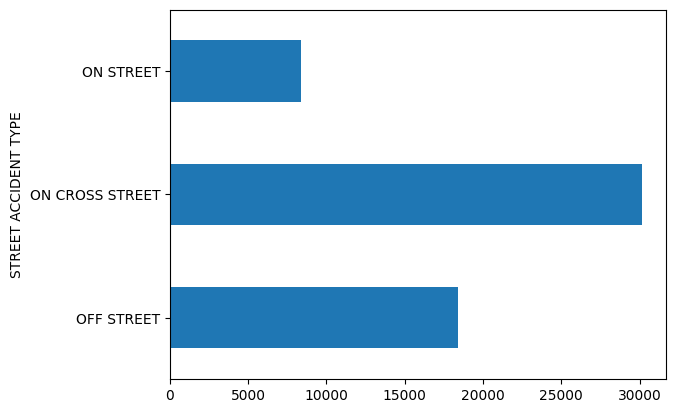

In [ ]:
street_accident_type = df_eda.groupby(df_eda['STREET ACCIDENT TYPE'])['COLLISION_ID'].count()
street_accident_type.plot(kind='barh')

##1.5 Check human factor that most contributed to accidents

<Axes: ylabel='CONTRIBUTING FACTOR VEHICLE 1'>

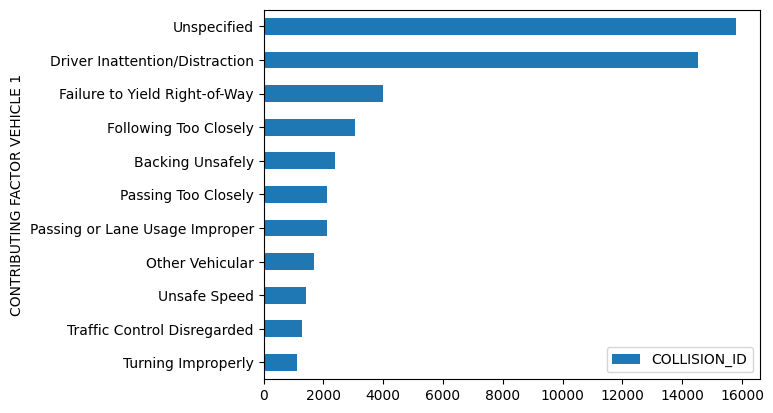

In [ ]:
contribute_factor = df_eda.groupby(['CONTRIBUTING FACTOR VEHICLE 1'])['COLLISION_ID'].count()
contribute_factor = contribute_factor.reset_index()
contribute_factor = contribute_factor.sort_values('COLLISION_ID', ascending = False)  #sort the values
contribute_factor.head(11)
contribute_factor.head(11).sort_values('COLLISION_ID', ascending = True).plot(kind='barh', x = 'CONTRIBUTING FACTOR VEHICLE 1', y = 'COLLISION_ID')

##1.6 Check vehicle factor that most contributed to accidents

<Axes: ylabel='VEHICLE TYPE CODE 1'>

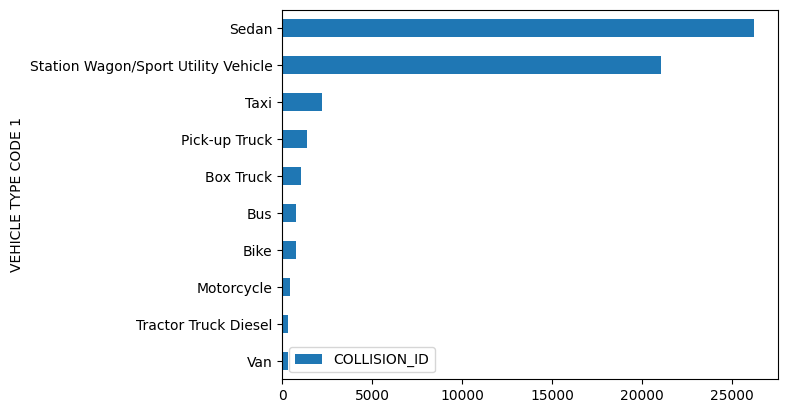

In [ ]:
vehicle_type = df_eda.groupby(['VEHICLE TYPE CODE 1'])['COLLISION_ID'].count()
vehicle_type = vehicle_type.reset_index()
vehicle_type = vehicle_type.sort_values('COLLISION_ID', ascending = False)  #sort the values
vehicle_type.head(10).sort_values('COLLISION_ID', ascending = True).plot(kind='barh', x = 'VEHICLE TYPE CODE 1', y = 'COLLISION_ID')

<Axes: ylabel='VEHICLE TYPE CODE 2'>

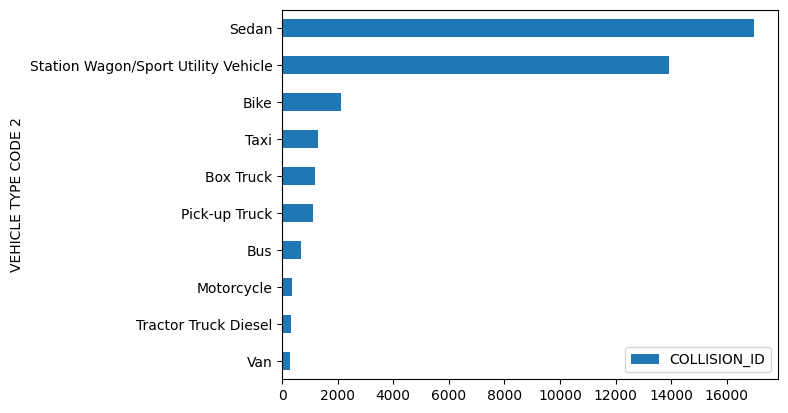

In [ ]:
vehicle_type = df_eda.groupby(['VEHICLE TYPE CODE 2'])['COLLISION_ID'].count()
vehicle_type = vehicle_type.reset_index()
vehicle_type = vehicle_type.sort_values('COLLISION_ID', ascending = False)  #sort the values
vehicle_type = vehicle_type[~(vehicle_type['VEHICLE TYPE CODE 2'] == '-')]
vehicle_type.head(10).sort_values('COLLISION_ID', ascending = True).plot(kind='barh', x = 'VEHICLE TYPE CODE 2', y = 'COLLISION_ID')

##2.1 Check Month, Week and Day when most severe accidents happened

In [ ]:
rows = df_eda[(df_eda['NUMBER OF PERSONS KILLED']>0)]['NUMBER OF PERSONS KILLED'].count()
print(f'rows with PERSON KILLED = {rows} rows')
totalkilled = df_eda['NUMBER OF PERSONS KILLED'].sum()
print(f'total PERSON KILLED = {totalkilled}')

rows = df_eda[(df_eda['NUMBER OF PERSONS INJURED']>0)]['NUMBER OF PERSONS INJURED'].count()
print(f'rows with PERSON INJURED = {rows} rows')
totalinjured = df_eda['NUMBER OF PERSONS INJURED'].sum()
print(f'total PERSON INJURED = {totalinjured}')

rows with PERSON KILLED = 121 rows
total PERSON KILLED = 128
rows with PERSON INJURED = 18271 rows
total PERSON INJURED = 24526


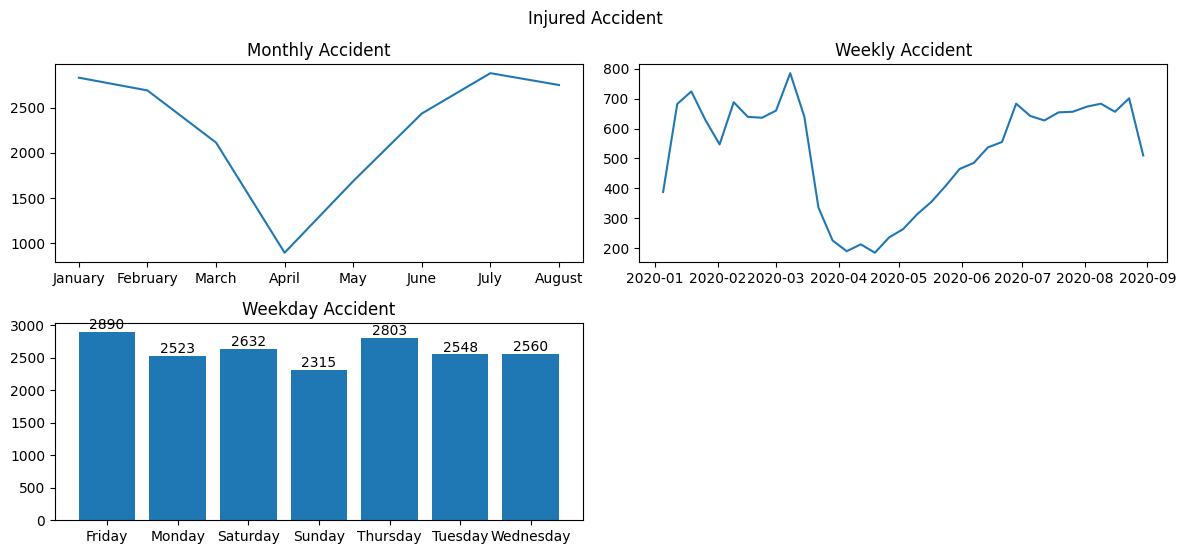

In [ ]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)

df_eda_injured_person = df_eda[(df_eda['NUMBER OF PERSONS INJURED']>0)].copy()
#chart 1
df_accident_monthly = df_eda_injured_person.groupby(pd.Grouper(key='CRASH DATE', freq='M')).count()['COLLISION_ID']
df_accident_monthly = pd.DataFrame(df_accident_monthly)
df_accident_monthly = df_accident_monthly.reset_index()
df_accident_monthly['MONTH NAME'] = df_accident_monthly['CRASH DATE'].dt.month_name()
ax1.plot(df_accident_monthly['MONTH NAME'], df_accident_monthly['COLLISION_ID'])
ax1.set_title('Monthly Accident')

# #chart 2
df_accident_weekly = df_eda_injured_person.groupby(pd.Grouper(key='CRASH DATE', freq='W')).count()['COLLISION_ID']
df_accident_weekly = pd.DataFrame(df_accident_weekly)
df_accident_weekly = df_accident_weekly.reset_index()
ax2.plot(df_accident_weekly['CRASH DATE'], df_accident_weekly['COLLISION_ID'])
ax2.set_title('Weekly Accident')

# #chart 3
df_accident_weekday = df_eda_injured_person.groupby(df_eda['CRASH DATE'].dt.day_name())['COLLISION_ID'].count()
df_accident_weekday = pd.DataFrame(df_accident_weekday)
df_accident_weekday = df_accident_weekday.reset_index()
ax3_container = ax3.bar(df_accident_weekday['CRASH DATE'], df_accident_weekday['COLLISION_ID'])
ax3.set_title('Weekday Accident')
ax3.bar_label(ax3_container)

# Set figure's title
fig.suptitle("Injured Accident")

plt.tight_layout()

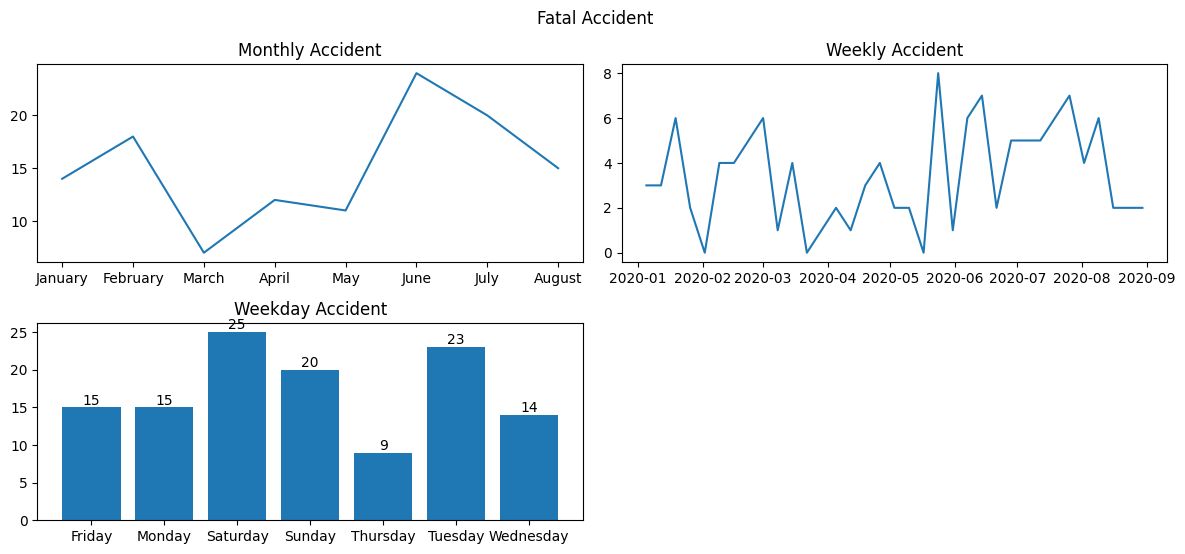

In [ ]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)

df_eda_killed_person = df_eda[(df_eda['NUMBER OF PERSONS KILLED']>0)].copy()
#chart 1
df_accident_monthly = df_eda_killed_person.groupby(pd.Grouper(key='CRASH DATE', freq='M')).count()['COLLISION_ID']
df_accident_monthly = pd.DataFrame(df_accident_monthly)
df_accident_monthly = df_accident_monthly.reset_index()
df_accident_monthly['MONTH NAME'] = df_accident_monthly['CRASH DATE'].dt.month_name()
ax1.plot(df_accident_monthly['MONTH NAME'], df_accident_monthly['COLLISION_ID'])
ax1.set_title('Monthly Accident')

# #chart 2
df_accident_weekly = df_eda_killed_person.groupby(pd.Grouper(key='CRASH DATE', freq='W')).count()['COLLISION_ID']
df_accident_weekly = pd.DataFrame(df_accident_weekly)
df_accident_weekly = df_accident_weekly.reset_index()
ax2.plot(df_accident_weekly['CRASH DATE'], df_accident_weekly['COLLISION_ID'])
ax2.set_title('Weekly Accident')

# #chart 3
df_accident_weekday = df_eda_killed_person.groupby(df_eda['CRASH DATE'].dt.day_name())['COLLISION_ID'].count()
df_accident_weekday = pd.DataFrame(df_accident_weekday)
df_accident_weekday = df_accident_weekday.reset_index()
ax3_container = ax3.bar(df_accident_weekday['CRASH DATE'], df_accident_weekday['COLLISION_ID'])
ax3.set_title('Weekday Accident')
ax3.bar_label(ax3_container)

# Set figure's title
fig.suptitle("Fatal Accident")

plt.tight_layout()

##2.2 Check time / hour when most severe accidents happened

<Axes: xlabel='CRASH TIME'>

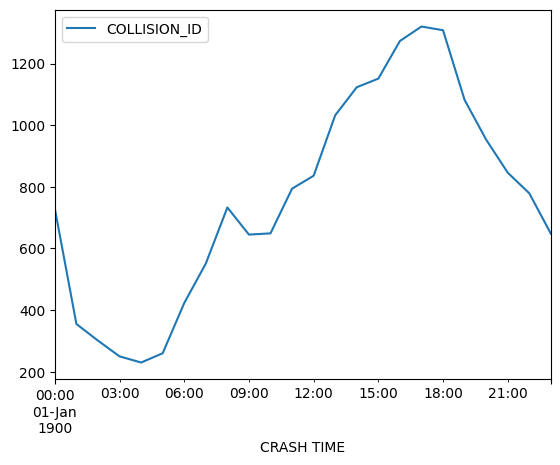

In [ ]:
df_eda_injured_person = df_eda[(df_eda['NUMBER OF PERSONS INJURED']>0)].copy()
accident_hourly = df_eda_injured_person.groupby(pd.Grouper(key='CRASH TIME', freq='H')).count()['COLLISION_ID']
accident_hourly = pd.DataFrame(accident_hourly)
# Visualize the data
accident_hourly.plot(kind='line')

<Axes: xlabel='CRASH TIME'>

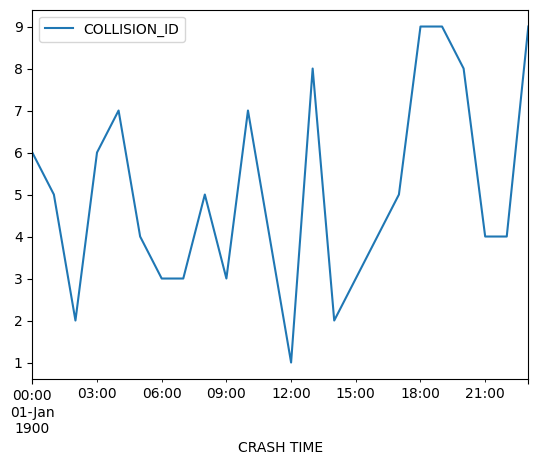

In [ ]:
# Let's do trend of accidents
df_eda_killed_person = df_eda[(df_eda['NUMBER OF PERSONS KILLED']>0)].copy()
accident_hourly = df_eda_killed_person.groupby(pd.Grouper(key='CRASH TIME', freq='H')).count()['COLLISION_ID']
accident_hourly = pd.DataFrame(accident_hourly)
# Visualize the data
accident_hourly.plot(kind='line')

##2.3 Check borough where most severe accidents happened

<Axes: ylabel='BOROUGH'>

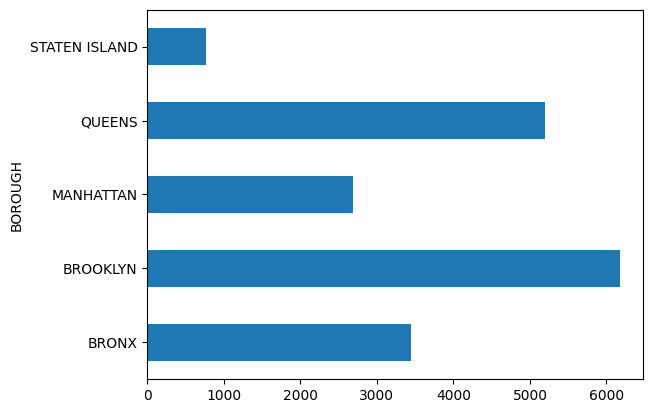

In [ ]:
df_eda_injured_person = df_eda[(df_eda['NUMBER OF PERSONS INJURED']>0)].copy()
accident_borough = df_eda_injured_person.groupby(df_eda_injured_person['BOROUGH'])['COLLISION_ID'].count()
accident_borough.plot(kind='barh')

<Axes: ylabel='BOROUGH'>

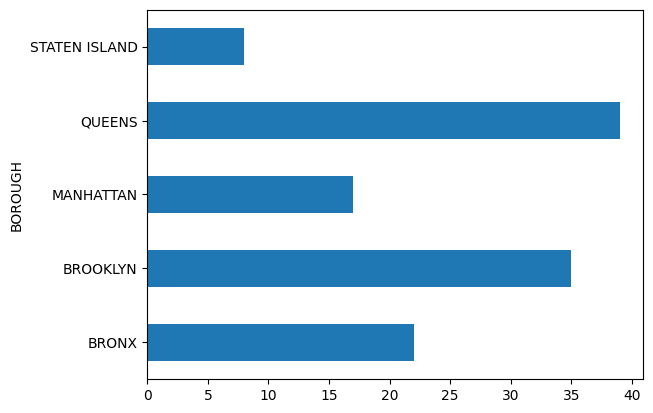

In [ ]:
df_eda_killed_person = df_eda[(df_eda['NUMBER OF PERSONS KILLED']>0)].copy()
accident_borough = df_eda_killed_person.groupby(df_eda_killed_person['BOROUGH'])['COLLISION_ID'].count()
accident_borough.plot(kind='barh')

##2.4 Check street where most severe accidents happened

In [ ]:
accident_street = df_eda[(df_eda['NUMBER OF PERSONS INJURED']>0)].groupby([df_eda['ON STREET NAME'], df_eda['CROSS STREET NAME'], df_eda['OFF STREET NAME'] ])['COLLISION_ID'].count()
accident_street = accident_street.reset_index()
accident_street = accident_street.sort_values('COLLISION_ID', ascending = False)
accident_street.head(20)

,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,COLLISION_ID
5754,BELT PARKWAY,-,-,395
8234,GRAND CENTRAL PKWY,-,-,205
6121,BROOKLYN QUEENS EXPRESSWAY,-,-,196
9143,LONG ISLAND EXPRESSWAY,-,-,194
7829,FDR DRIVE,-,-,183
9231,MAJOR DEEGAN EXPRESSWAY,-,-,180
11114,VAN WYCK EXPWY,-,-,154
6670,CROSS BRONX EXPY,-,-,144
6671,CROSS ISLAND PARKWAY,-,-,121
6188,BRUCKNER EXPRESSWAY,-,-,101


<Axes: ylabel='STREET ACCIDENT TYPE'>

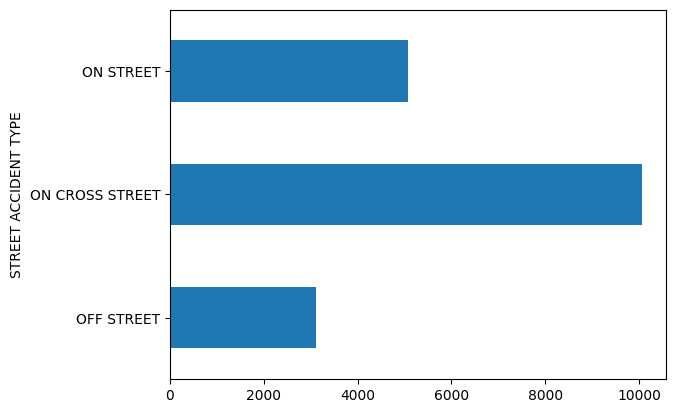

In [ ]:
df_eda_injured_person = df_eda[(df_eda['NUMBER OF PERSONS INJURED']>0)].copy()
street_accident_type = df_eda_injured_person.groupby(df_eda['STREET ACCIDENT TYPE'])['COLLISION_ID'].count()
street_accident_type.plot(kind='barh')

In [ ]:
accident_street = df_eda[(df_eda['NUMBER OF PERSONS KILLED']>0)].groupby([df_eda['ON STREET NAME'], df_eda['CROSS STREET NAME'], df_eda['OFF STREET NAME'] ])['COLLISION_ID'].count()
accident_street = accident_street.reset_index()
accident_street = accident_street.sort_values('COLLISION_ID', ascending = False)
accident_street.head(20)

,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,COLLISION_ID
51,CROSS ISLAND PARKWAY,-,-,4
34,BROOKLYN QUEENS EXPRESSWAY,-,-,3
37,BRUCKNER EXPRESSWAY,-,-,3
70,HENRY HUDSON PARKWAY,-,-,3
33,BRONX RIVER PARKWAY,-,-,2
45,COLLEGE POINT BOULEVARD,-,-,2
68,GRAND CENTRAL PKWY,-,-,2
0,-,-,124-50 METROPOLITAN AVENUE,1
71,HYLAN BOULEVARD,CORNELIA AVENUE,-,1
78,MORNINGSIDE AVENUE,-,-,1


<Axes: ylabel='STREET ACCIDENT TYPE'>

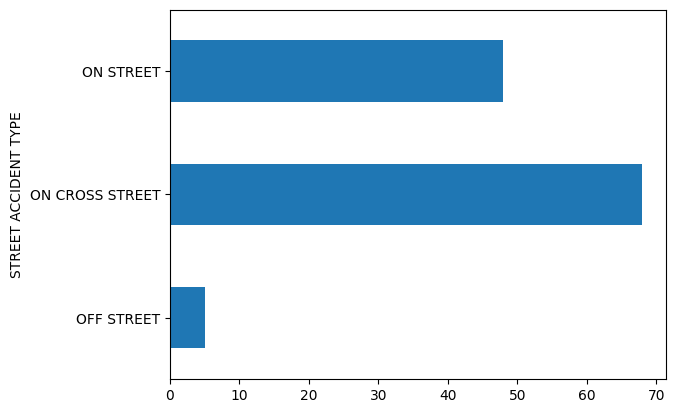

In [ ]:
df_eda_killed_person = df_eda[(df_eda['NUMBER OF PERSONS KILLED']>0)].copy()
street_accident_type = df_eda_killed_person.groupby(df_eda['STREET ACCIDENT TYPE'])['COLLISION_ID'].count()
street_accident_type.plot(kind='barh')

##2.5 Check human factor that most contributed to severe accidents

<Axes: ylabel='CONTRIBUTING FACTOR VEHICLE 1'>

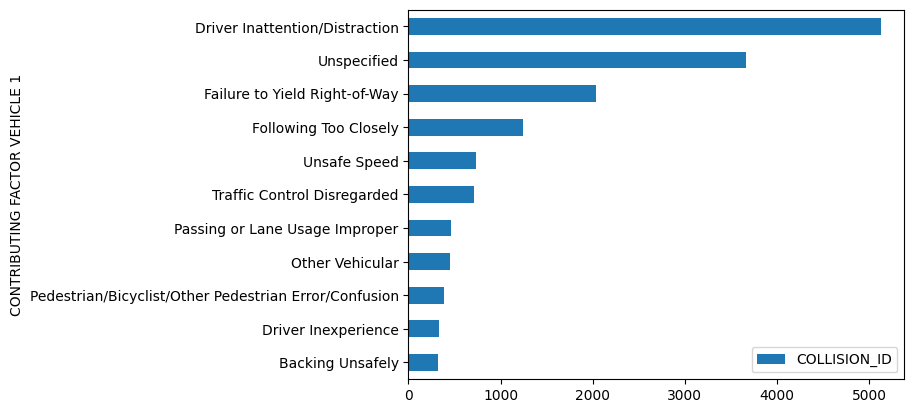

In [ ]:
df_eda_injured_person = df_eda[(df_eda['NUMBER OF PERSONS INJURED']>0)].copy()
contribute_factor = df_eda_injured_person.groupby(['CONTRIBUTING FACTOR VEHICLE 1'])['COLLISION_ID'].count()
contribute_factor = contribute_factor.reset_index()
contribute_factor = contribute_factor.sort_values('COLLISION_ID', ascending = False)  #sort the values
contribute_factor.head(11)
contribute_factor.head(11).sort_values('COLLISION_ID', ascending = True).plot(kind='barh', x = 'CONTRIBUTING FACTOR VEHICLE 1', y = 'COLLISION_ID')

In [ ]:
contribute_factor.head(5)

,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID
9,Driver Inattention/Distraction,5127
50,Unspecified,3667
15,Failure to Yield Right-of-Way,2041
18,Following Too Closely,1242
49,Unsafe Speed,732


<Axes: ylabel='CONTRIBUTING FACTOR VEHICLE 1'>

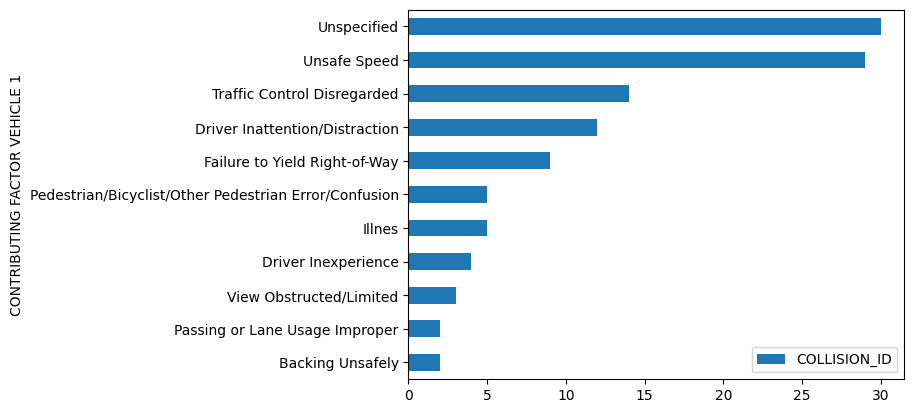

In [ ]:
df_eda_killed_person = df_eda[(df_eda['NUMBER OF PERSONS KILLED']>0)].copy()
contribute_factor = df_eda_killed_person.groupby(['CONTRIBUTING FACTOR VEHICLE 1'])['COLLISION_ID'].count()
contribute_factor = contribute_factor.reset_index()
contribute_factor = contribute_factor.sort_values('COLLISION_ID', ascending = False)  #sort the values
contribute_factor.head(11)
contribute_factor.head(11).sort_values('COLLISION_ID', ascending = True).plot(kind='barh', x = 'CONTRIBUTING FACTOR VEHICLE 1', y = 'COLLISION_ID')

In [ ]:
contribute_factor.head(5)

,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID
15,Unspecified,30
14,Unsafe Speed,29
12,Traffic Control Disregarded,14
3,Driver Inattention/Distraction,12
5,Failure to Yield Right-of-Way,9


##2.6 Check vehicle factor that most contributed to severe accidents

<Axes: ylabel='VEHICLE TYPE CODE 1'>

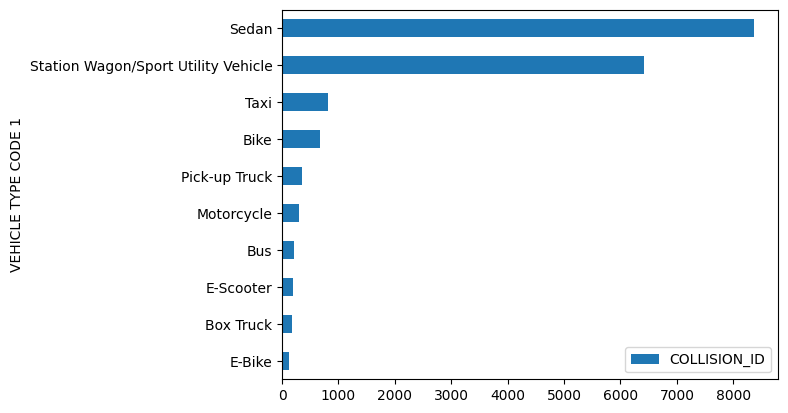

In [ ]:
df_eda_injured_person = df_eda[(df_eda['NUMBER OF PERSONS INJURED']>0)].copy()
vehicle_type = df_eda_injured_person.groupby(['VEHICLE TYPE CODE 1'])['COLLISION_ID'].count()
vehicle_type = vehicle_type.reset_index()
vehicle_type = vehicle_type.sort_values('COLLISION_ID', ascending = False)  #sort the values
vehicle_type.head(10).sort_values('COLLISION_ID', ascending = True).plot(kind='barh', x = 'VEHICLE TYPE CODE 1', y = 'COLLISION_ID')

<Axes: ylabel='VEHICLE TYPE CODE 2'>

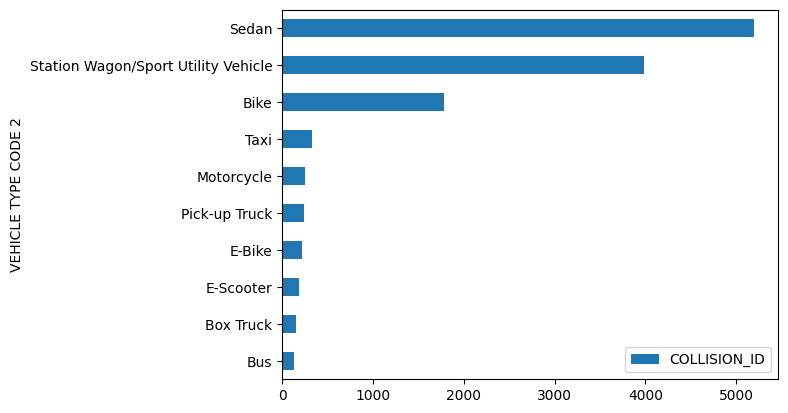

In [ ]:
df_eda_injured_person = df_eda[(df_eda['NUMBER OF PERSONS INJURED']>0)].copy()
vehicle_type = df_eda_injured_person.groupby(['VEHICLE TYPE CODE 2'])['COLLISION_ID'].count()
vehicle_type = vehicle_type.reset_index()
vehicle_type = vehicle_type.sort_values('COLLISION_ID', ascending = False)  #sort the values
vehicle_type = vehicle_type[~(vehicle_type['VEHICLE TYPE CODE 2'] == '-')]
vehicle_type.head(10).sort_values('COLLISION_ID', ascending = True).plot(kind='barh', x = 'VEHICLE TYPE CODE 2', y = 'COLLISION_ID')

<Axes: ylabel='VEHICLE TYPE CODE 1'>

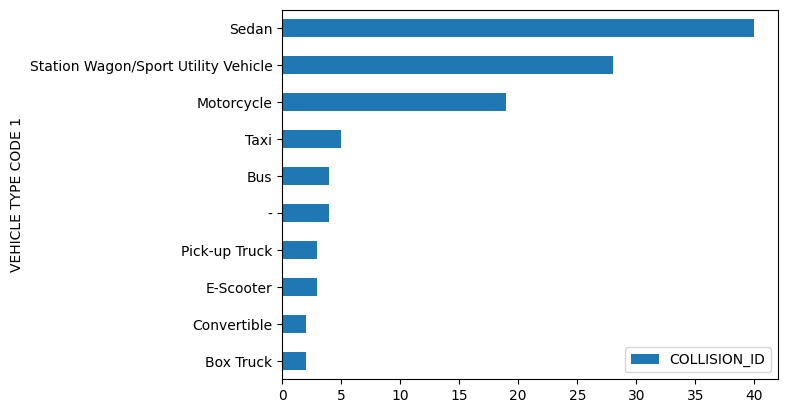

In [ ]:
df_eda_killed_person = df_eda[(df_eda['NUMBER OF PERSONS KILLED']>0)].copy()
vehicle_type = df_eda_killed_person.groupby(['VEHICLE TYPE CODE 1'])['COLLISION_ID'].count()
vehicle_type = vehicle_type.reset_index()
vehicle_type = vehicle_type.sort_values('COLLISION_ID', ascending = False)  #sort the values
vehicle_type.head(10).sort_values('COLLISION_ID', ascending = True).plot(kind='barh', x = 'VEHICLE TYPE CODE 1', y = 'COLLISION_ID')

<Axes: ylabel='VEHICLE TYPE CODE 2'>

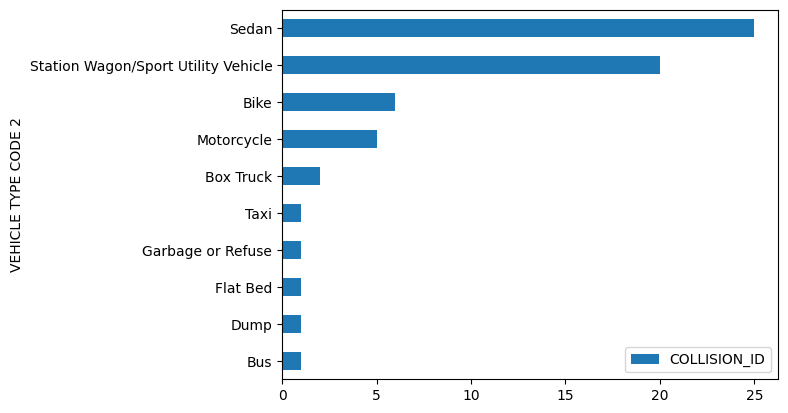

In [ ]:
df_eda_killed_person = df_eda[(df_eda['NUMBER OF PERSONS KILLED']>0)].copy()
vehicle_type = df_eda_killed_person.groupby(['VEHICLE TYPE CODE 2'])['COLLISION_ID'].count()
vehicle_type = vehicle_type.reset_index()
vehicle_type = vehicle_type.sort_values('COLLISION_ID', ascending = False)  #sort the values
vehicle_type = vehicle_type[~(vehicle_type['VEHICLE TYPE CODE 2'] == '-')]
vehicle_type.head(10).sort_values('COLLISION_ID', ascending = True).plot(kind='barh', x = 'VEHICLE TYPE CODE 2', y = 'COLLISION_ID')